In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)
df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df[df['EstimatedSalary'].isnull()]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [6]:
df[df['Exited'] == 0]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


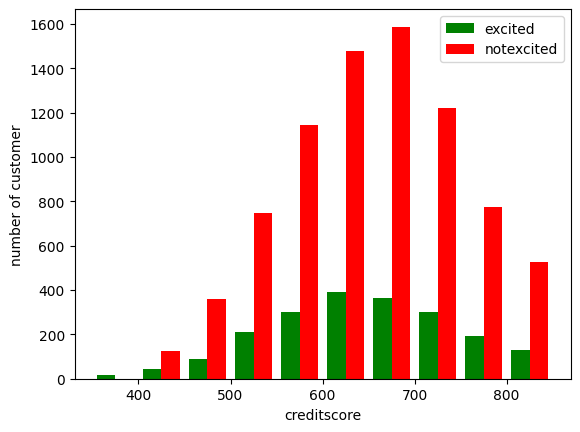

In [7]:
number_of_excited = df[df['Exited'] == 1].CreditScore
number_of_not_excited = df[df['Exited'] == 0].CreditScore

plt.xlabel('creditscore')
plt.ylabel('number of customer')
plt.hist([number_of_excited, number_of_not_excited], color=[
         'green', 'red'], label=['excited', 'notexcited'])
plt.legend()


In [8]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column} :{df[column].unique()}')


Geography :['France' 'Spain' 'Germany']
Gender :['Female' 'Male']


In [9]:
df['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
df.Gender.unique()


array([1, 0], dtype=int64)

In [10]:
df2 = pd.get_dummies(data=df, columns=['Geography'])


In [11]:
from sklearn.preprocessing import MinMaxScaler
col_to_sacle = ['CreditScore', 'Age', 'Tenure',
                'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = MinMaxScaler()
df2[col_to_sacle] = scaler.fit_transform(df[col_to_sacle])
df2.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [12]:
x = df2.drop('Exited', axis='columns')
y = df2['Exited']


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.2, random_state=5)


In [14]:
X_train.shape
len(X_train.columns)


12

In [15]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(12,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=100)


Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5088 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.8064
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8119
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8184
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8189
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8211
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8231
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4036 - accura

In [16]:
model.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8585


[0.3499222993850708, 0.8585000038146973]

In [17]:
yp = model.predict(X_test)
      

63/63 [==============================] - 0s 893us/step


In [18]:
Y_test[0:5]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_29620\582003514.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Y_test[0:5]


7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [19]:
y_preddict = []
for ele in yp:
    if ele>0.5:
        y_preddict.append(1)
    else:
        y_preddict.append(0)
        
yp[0:5]        
y_preddict[0:5]  

[0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,y_preddict))

Text(95.72222222222221, 0.5, 'Truth')

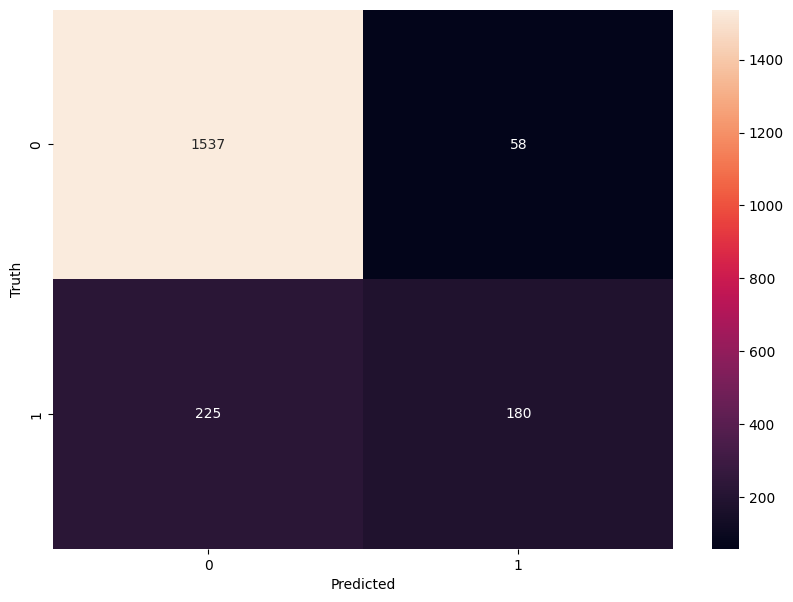

In [21]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_preddict)
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')